# CNN

Trying to solve the problem with tensorflow and keras, using a convolutional neural network.

## Loading dataset

Loading dataset from tensorflow

In [1]:
from tensorflow.keras.datasets import mnist


(x, y), (x_test, y_test) = mnist.load_data()

x = x / 255.
x_test = x_test / 255.

2023-09-03 10:49:25.622994: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/lib/python3.11/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.2 when it was built against 1.14.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


## The CNN model

The model is a simple convolutional network

2023-09-03 10:49:28.821652: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-03 10:49:28.841533: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-03 10:49:28.841771: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

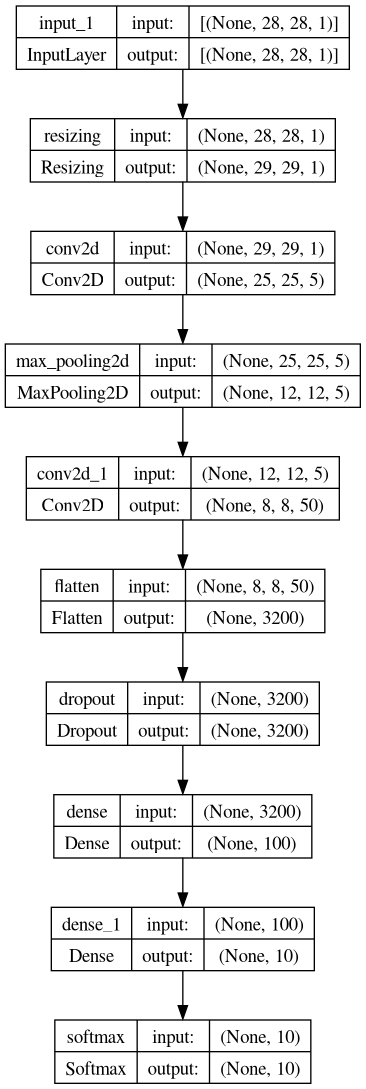

In [2]:
from tensorflow.keras import layers
from tensorflow.keras.losses import SparseCategoricalCrossentropy 
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model


model = Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Resizing(29, 29),


    layers.Conv2D(5, (5, 5), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(50, (5, 5), activation='relu'),

    layers.Flatten(),
    layers.Dropout(1/3),
    layers.Dense(100, activation='relu'),

    layers.Dense(10),
    layers.Softmax()
])

model.compile(
    optimizer = 'adam',
    loss = SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

plot_model(model, show_shapes = True)

## Training

In [3]:
model.fit(x, y, validation_split=0.2, epochs=200)

Epoch 1/200


2023-09-03 10:49:30.108452: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8902
2023-09-03 10:49:30.165920: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-09-03 10:49:30.369697: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-09-03 10:49:30.413174: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f3cb078bff0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-03 10:49:30.413197: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-09-03 10:49:30.417749: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-03 10:

1500/1500 [==============================] - 6s 3ms/step - loss: 0.1797 - accuracy: 0.9445 - val_loss: 0.0590 - val_accuracy: 0.9816
Epoch 2/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0620 - accuracy: 0.9806 - val_loss: 0.0567 - val_accuracy: 0.9841
Epoch 3/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0462 - accuracy: 0.9859 - val_loss: 0.0454 - val_accuracy: 0.9872
Epoch 4/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0347 - accuracy: 0.9890 - val_loss: 0.0499 - val_accuracy: 0.9861
Epoch 5/200
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0281 - accuracy: 0.9910 - val_loss: 0.0445 - val_accuracy: 0.9878
Epoch 6/200
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0235 - accuracy: 0.9923 - val_loss: 0.0410 - val_accuracy: 0.9890
Epoch 7/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0175 - accuracy: 0.9942 - val_loss: 0.0457 - val_accuracy: 0.98

## Performance

In [4]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.2488 - accuracy: 0.9898 - 362ms/epoch - 1ms/step


[0.2488335520029068, 0.989799976348877]

## References

1.  Simard, P. Y., Steinkraus, D., & Platt, J. C. (n.d.). Best practices for convolutional neural networks applied to visual document analysis. *Seventh International Conference on Document Analysis and Recognition, 2003*. Proceedings. https://doi.org/10.1109/icdar.2003.1227801